# PROGETTO FINALE - Master Data Analysis - Information

# ***Analisi dei dati di una testata online di divulgazione scientifica***

## Introduzione

In questo progetto esaminerò un dataset ricco di informazioni riguardanti una testata online che crea contenuti a tema scientifico e tecnologico. Come testata online specializzata in divulagazione scientifica, l'obiettivo della piattaforma è rendere le notizie e le scoperte scientifiche non solo accessibili, ma anche coinvolgenti per un vasto pubblico.

## Obiettivi

Gli obiettivi di questa analisi includono una **panoramica dettagliata del dataset** e la risposta alle seguenti domande, focalizzate sull'anno 2021: 
- **quali sono gli articoli più letti nel 2021?**
- **come sono cambiati gli interessi durante l'anno?**
- **gli utenti fedeli stanno aumentando o diminuendo?**
- **quali contenuti sono più efficaci nel coinvolgere gli utenti?**

## Struttura del notebook

Il notebook è organizzato in sezioni che guidano attraverso le varie fasi dell'analisi:
- [Data Cleaning](#data_cleaning)
- [Data Exploration/Visualization](#data_exploration)
- [Focus sul 2021](#focus_2021)
- [Proposta di strategia](#proposta_di_strategia)
- [Conclusioni](#conclusioni)

### Data Cleaning
<a id="data_cleaning"></a>

In [73]:
# import 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn style
sns.set()

In [74]:
# load and show
df = pd.read_csv('final_info.csv')
df.head()

,read_date,user_uuid,category,journalist_id,language,length,country,subscription_date,platform,article_id,stars
0,19-2-2022,190,sport,117,fr,long,fr,28-6-2021,tablet,331708,2
1,25-2-2021,243,art,117,it,short,it,24-8-2020,tablet,5128,3
2,19-12-2023,36,weather,115,en,long,uk,7-2-2021,tablet,733403,5
3,27-3-2023,162,finance,111,it,short,it,6-9-2022,tablet,612638,1
4,22-10-2023,181,economy,119,fr,short,fr,9-12-2020,tablet,211458,3


In [75]:
# dimensions
print(f'Dimensioni del DataFrame: {df.shape}\n')

# general info
df.info()

Dimensioni del DataFrame: (999, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   read_date          999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   journalist_id      999 non-null    int64 
 4   language           999 non-null    object
 5   length             999 non-null    object
 6   country            999 non-null    object
 7   subscription_date  999 non-null    object
 8   platform           999 non-null    object
 9   article_id         999 non-null    int64 
 10  stars              999 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 86.0+ KB


Dagli output precedenti notiamo che i record sono 999 e le colonne 11. Non ci sono valori nulli, quindi in questa sezione di pulizia del dataframe l'unica operazione che effettuo è la trasformazione del formato dei valori di alcune colonne: sicuramente trattare le date in datetime è più conveniente, inoltre posso trasformare anche i valori che rappresentano gli identificativi in stringhe, anzichè tenerli in numeri interi.

In [76]:
# Trasformazione delle colonne di date in formato datetime
df[['read_date', 'subscription_date']] = df[['read_date', 'subscription_date']].apply(pd.to_datetime, dayfirst=True)

# Conversione degli identificativi in stringhe
for col in ['user_uuid', 'journalist_id', 'article_id']:
    df[col] = df[col].astype(str)

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   read_date          999 non-null    datetime64[ns]
 1   user_uuid          999 non-null    object        
 2   category           999 non-null    object        
 3   journalist_id      999 non-null    object        
 4   language           999 non-null    object        
 5   length             999 non-null    object        
 6   country            999 non-null    object        
 7   subscription_date  999 non-null    datetime64[ns]
 8   platform           999 non-null    object        
 9   article_id         999 non-null    object        
 10  stars              999 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 86.0+ KB


### Data Exploration/Visualization
<a id="data_exploration"></a>

Seguirò un approccio logico per l'analisi esplorativa dei dati:
1. ***Variabili Categoriche*** : (category, language, country, platform, length)
2. ***Analisi delle Date*** : (subscription_date, read_date)
3. ***Analisi degli Identificativi*** : (user_uuid, journalist_id, article_id)
4. ***Variabili Numeriche*** : (stars)

## Variabili Categoriche

In [77]:
# definizione funzione analitica

def analyze_categoric(df, column_name, colors, figsize=(14, 6)):
    # Calcolo della distribuzione
    distribution = df[column_name].value_counts().reset_index()
    distribution.columns = [column_name, 'articles_count']
    total_articles = distribution['articles_count'].sum()
    distribution['percentage'] = (distribution['articles_count'] / total_articles) * 100
    
    # Grafici
    plt.figure(figsize=figsize)
    
    # Grafico a barre
    plt.subplot(1, 2, 1)
    bars = plt.bar(distribution[column_name], distribution['articles_count'], color=colors, edgecolor='black')
    plt.title(f'Distribuzione degli Articoli per {column_name.capitalize()} (Barre)')
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Numero di Articoli')
    
    # Aggiunta delle etichette per ogni barra
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    
    # Grafico a ciambella
    plt.subplot(1, 2, 2)
    plt.pie(distribution['articles_count'], labels=distribution[column_name],
            autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=colors)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(f'Distribuzione degli Articoli per {column_name.capitalize()} (Ciambella)')
    
    plt.tight_layout()
    plt.show()
    
    # df di recap
    return distribution.round(2)

### Category

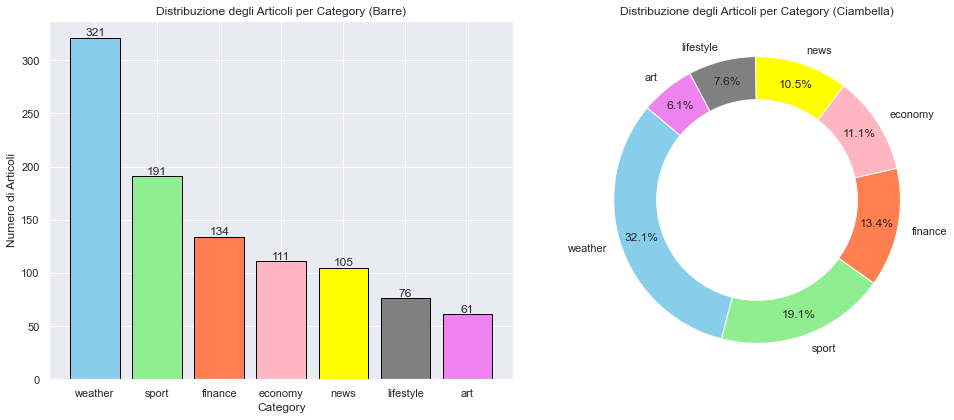

,category,articles_count,percentage
0,weather,321,32.13
1,sport,191,19.12
2,finance,134,13.41
3,economy,111,11.11
4,news,105,10.51
5,lifestyle,76,7.61
6,art,61,6.11


In [78]:
# definisco i colori e chiamo la funzione su category
cat_colors = ['skyblue', 'lightgreen', 'coral', 'lightpink', 'yellow', 'grey', 'violet']
category_summary = analyze_categoric(df, 'category', cat_colors)
category_summary

La funzione che ho definito crea 2 grafici, uno a barre e uno a ciambella, e un df di recap con le informazioni dettagliate, per visualizzare efficacemente la distribuzione delle varie categorie, rendendo i dati facilmente interpretabili e permettendoci di comprendere quali argomenti catturano maggiormente l'interesse dei lettori. Sappiamo(l'abbiamo visualizzata prima in df.shape) che i record delle "sessioni di lettura" sono 999 e si sono articolati con la predominanza di alcune categorie: la categoria "weather" rappresenta la quota più significativa degli articoli, con il 32.13% del totale. Questo suggerisce un forte interesse da parte dei lettori per gli argomenti legati al clima e alle condizioni meteorologiche. Art risulta essere la categoria meno rappresentata con il 6,1% delle letture totali.

### Length

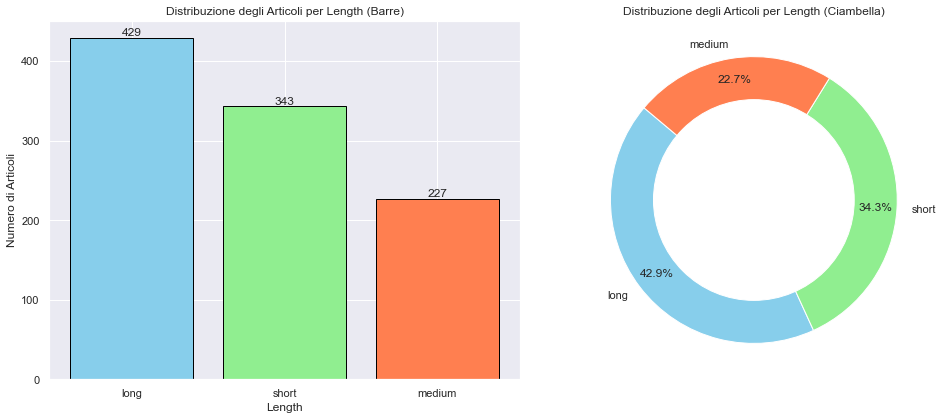

,length,articles_count,percentage
0,long,429,42.94
1,short,343,34.33
2,medium,227,22.72


In [79]:
# length
length_summary = analyze_categoric(df, 'length', ['skyblue', 'lightgreen', 'coral'])
length_summary

La maggioranza degli articoli (42.94%) rientra nella categoria "long". Questo indica che la testata tende a pubblicare contenuti approfonditi, forse con un focus su analisi dettagliate o argomenti complessi che richiedono spiegazioni più estese.  Circa un terzo degli articoli (34.33%) è classificato come "short". Questo suggerisce che c'è anche una notevole quantità di contenuti più concisi, probabilmente mirati a letture rapide o aggiornamenti brevi.  I restanti articoli (22.72%) sono di lunghezza "medium". 

### Platform

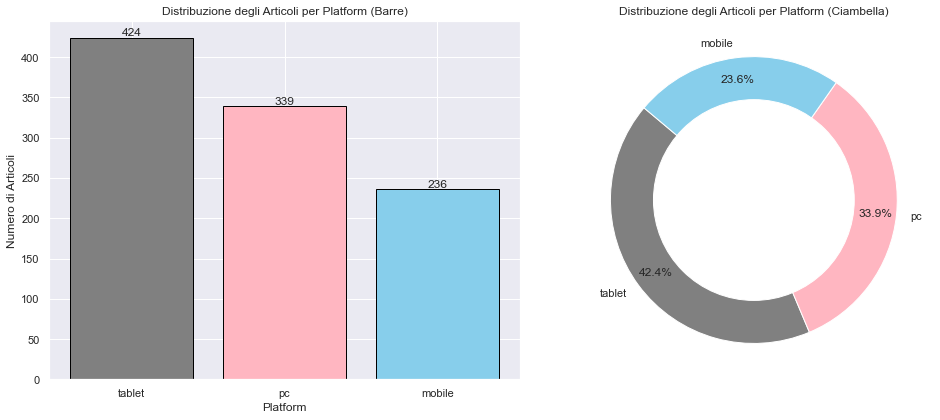

,platform,articles_count,percentage
0,tablet,424,42.44
1,pc,339,33.93
2,mobile,236,23.62


In [80]:
# platform
language_summary = analyze_categoric(df, 'platform', ['grey', 'lightpink', 'skyblue'])
language_summary

La piattaforma preferita dagli utenti per leggere gli articoli è il tablet, che con 424 letture, rappresenta il 42.44% del totale. Pc è in seconda posizione con 339 articoli letti su questo device (33.9%). Mobile, infine, rappresenta il 23.6% del totale, con 236 letture.

### Language e Country

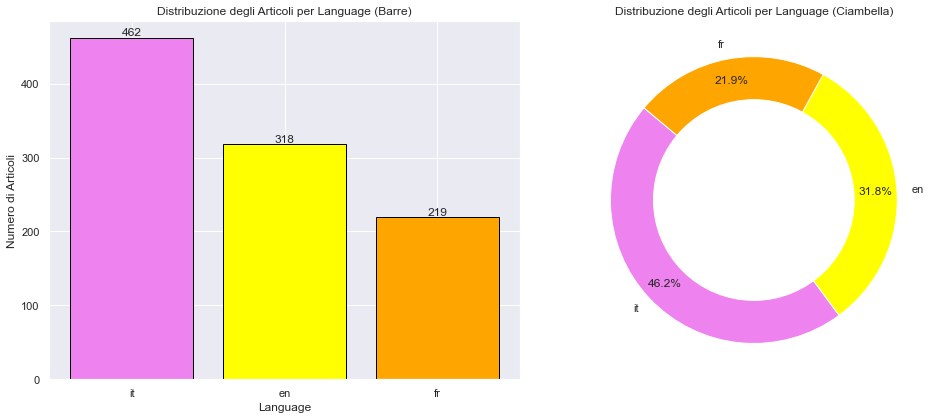

,language,articles_count,percentage
0,it,462,46.25
1,en,318,31.83
2,fr,219,21.92


In [81]:
# language
language_summary = analyze_categoric(df, 'language', ['violet', 'yellow', 'orange'])
language_summary

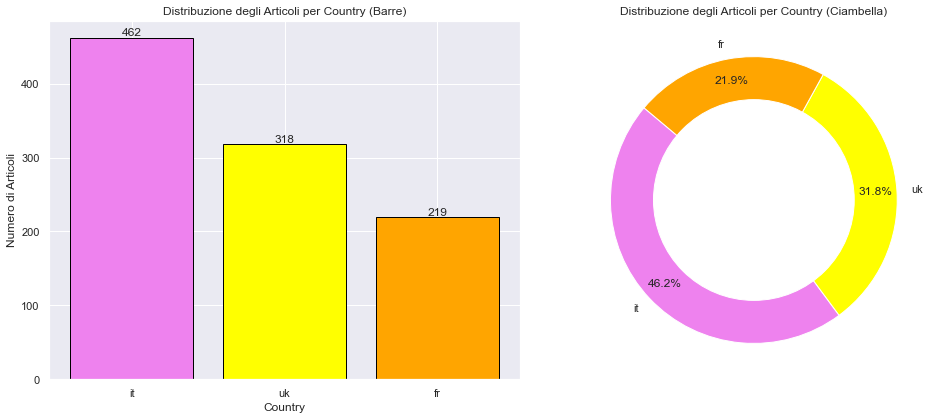

,country,articles_count,percentage
0,it,462,46.25
1,uk,318,31.83
2,fr,219,21.92


In [82]:
# country
country_summary = analyze_categoric(df, 'country', ['violet', 'yellow', 'orange'])
country_summary

Ho voluto analizzare insieme language e country perchè c'è una completa corrispondenza tra le due colonne, il che potrebbe suggerire che gli articoli sono specificatamente destinati a lettori in questi paesi o che i lettori tendono a leggere articoli nella loro lingua madre.La lingua italiana è la più rappresentata nel dataset, con il 46.25%, segue l'inglese con il 31.8% mentre il 21.9% è rappresentato dal francese.  La colonna country dovrebbe rappresentare la nazionalità dell'utente, per cui mi aspetterei di trovare che ogni utente ha solamente una country abbinata al suo ID: ebbene, non è così. Esplorando ulteriormente i dati mi sono accorto di questa "anomalia":

### "Anomalia nei dati"

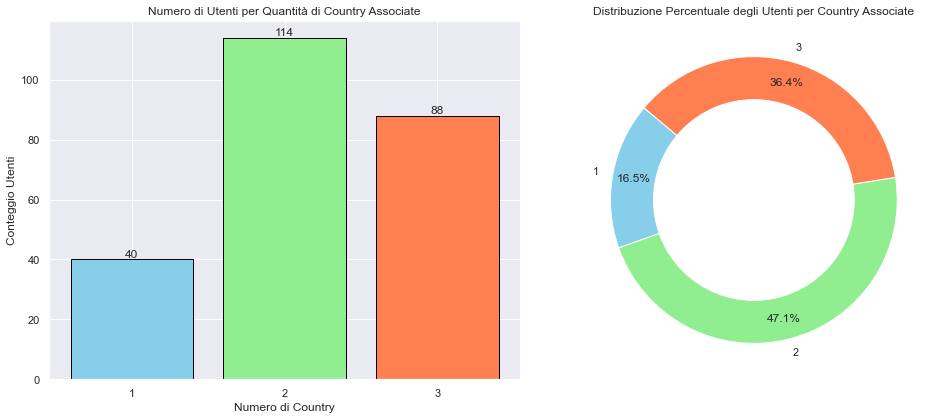

Utenti totali: 242


,Number of Countries,User Count,Percentage
0,1,40,16.53
1,2,114,47.11
2,3,88,36.36


In [83]:
# Raggruppamento per user_uuid e conteggio delle country uniche per utente
user_country_counts = df.groupby('user_uuid')['country'].nunique()

# Calcolo del conteggio totale per ciascun numero di country associate
country_count_distribution = user_country_counts.value_counts().sort_index()

# Calcolo del numero totale di utenti
total_users = user_country_counts.count()

# Calcolo delle percentuali
country_count_percentages = (country_count_distribution / total_users) * 100


# Creazione del df di recap
country_summary_df = pd.DataFrame({
    'Number of Countries': country_count_distribution.index,
    'User Count': country_count_distribution.values,
    'Percentage': country_count_percentages.values
})

# Grafico a Barre
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(country_summary_df['Number of Countries'].astype(str), 
               country_summary_df['User Count'], color=['skyblue', 'lightgreen', 'coral'], edgecolor='black')
plt.title('Numero di Utenti per Quantità di Country Associate')
plt.xlabel('Numero di Country')
plt.ylabel('Conteggio Utenti')

# Aggiunta delle etichette per ogni barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

# Grafico a Ciambella
plt.subplot(1, 2, 2)
plt.pie(country_summary_df['User Count'], labels=country_summary_df['Number of Countries'].astype(str),
        autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=['skyblue', 'lightgreen', 'coral'])
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Distribuzione Percentuale degli Utenti per Country Associate')

plt.tight_layout()
plt.show()

print(f'Utenti totali: {total_users}')

# df di recap
country_summary_df.round(2)

La maggior parte degli utenti (47.11%) è associata a due country diverse, il che è inusuale poiché normalmente ci si aspetterebbe che un utente abbia una sola nazionalità o country associata.
Il 36.36% degli utenti è associato addirittura a tre country, un'altra situazione atipica che meriterebbe un'indagine approfondita.
Solo il 16.53% degli utenti è associato a una singola country, che sarebbe il caso più comune in un tipico scenario di analisi di dati utente.


Una possibile spiegazione potrebbe essere che si tratti di un errore nei dati o nelle modalità di registrazione delle country. Ad esempio, potrebbero essere stati registrati più valori di country per errore o a causa di una scorretta interpretazione dei dati. Un'altra spiegazione potrebbe essere chiaramente che gli utenti hanno realmente più nazionalità, oppure che la colonna country, invece che essere rappresentativa della nazionalità dell'utente, ne rappresenti l'ubicazione nel momento della "sessione di letture". Ad ogni modo, questo tipo di analisi esula dall'obiettivo primario del progetto, motivo per cui ora torno all'analisi prestabilita, continuando con l'analisi delle date (read_date, subscription_date).

## Analisi delle date

In [84]:
# definizione funzione analitica
def analyze_time_series(df, date_column, unique_users=False, freq='M', figsize=(15, 6)):
    # Se necessario, identifica gli utenti unici -- (per le iscrizioni)
    if unique_users:
        df_copy = df.drop_duplicates(subset=['user_uuid']).copy()
    else:
        df_copy = df.copy()

    # mi assicuro che sia datetime e imposto data come indice
    df_copy[date_column] = pd.to_datetime(df_copy[date_column], dayfirst=True)
    df_copy.set_index(date_column, inplace=True)

    # Raggruppamento dei dati per il periodo specificato (default: mensile)
    time_series_data = df_copy.resample(freq).size()

    # Grafico serie temporale completa
    plt.figure(figsize=figsize)
    time_series_data.plot()
    plt.title(f'Andamento Temporale ({freq}) - {date_column.replace("_", " ").title()}')
    plt.xlabel('Data')
    plt.ylabel('Conteggio')
    plt.show()

    # Grafico comparato annuale
    df_copy['year'] = df_copy.index.year
    df_copy['month'] = df_copy.index.month
    monthly_yearly_data = df_copy.groupby(['year', 'month']).size().reset_index(name='count')
    plt.figure(figsize=figsize)
    sns.lineplot(data=monthly_yearly_data, x='month', y='count', hue='year', marker='o')
    plt.title(f'Confronto Mensile per Anno - {date_column.replace("_", " ").title()}')
    plt.xlabel('Mese')
    plt.ylabel('Conteggio')
    plt.xticks(range(1, 13))
    plt.legend(title='Anno')
    plt.grid(True)
    plt.show()
    
    # Creazione df di recap
    pivot_df = monthly_yearly_data.pivot('year', 'month', 'count')

    # Creazione heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, annot=True, fmt="d", cmap="coolwarm")
    plt.title(f"Heatmap ({freq}) - {date_column.replace('_', ' ').title()}")
    plt.xlabel("Mese")
    plt.ylabel("Anno")
    plt.show()

    # df di recap
    return pivot_df

In [85]:
def summarize_annual_data(df, figsize=(8, 8)):
    # Calcolo del totale annuale
    annual_totals = df.sum(axis=1)

    # percent
    total_count = annual_totals.sum()
    annual_percentages = (annual_totals / total_count) * 100

    # Creazione df di recap annuale
    annual_summary_df = pd.DataFrame({
        'Total': annual_totals,
        'Percentage': annual_percentages
    }).round(2)

    # Donut per l'andamento annuale
    plt.figure(figsize=figsize)
    plt.pie(annual_totals, labels=annual_totals.index, autopct='%1.1f%%', startangle=140, pctdistance=0.85)
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title('Distribuzione Percentuale Annuale')
    plt.show()

    # df di recap
    return annual_summary_df

### Subscription_date

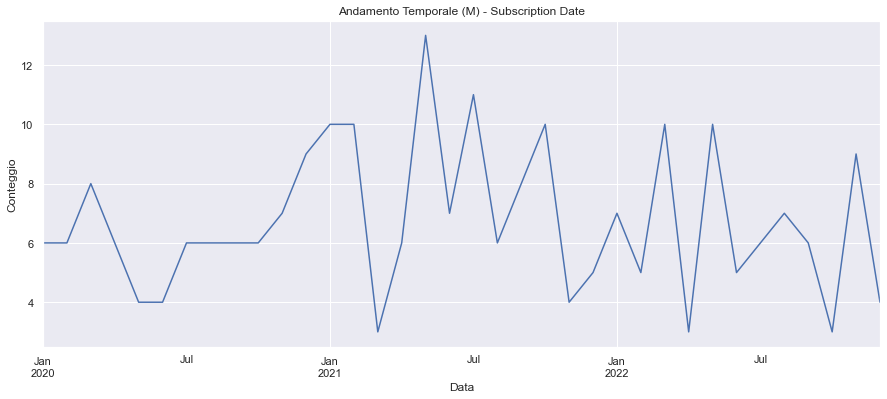

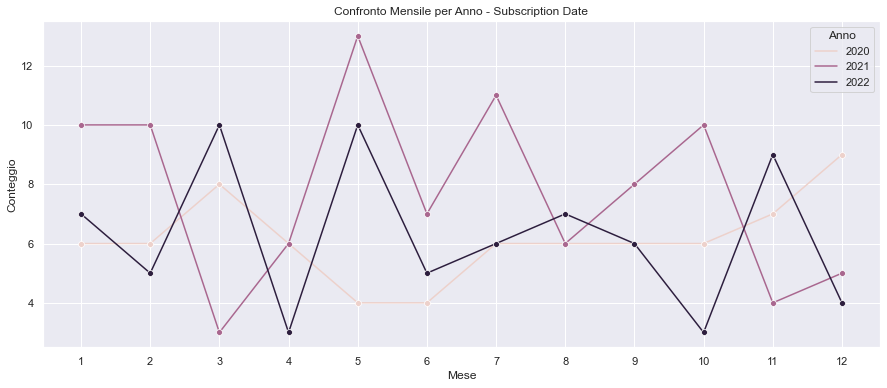

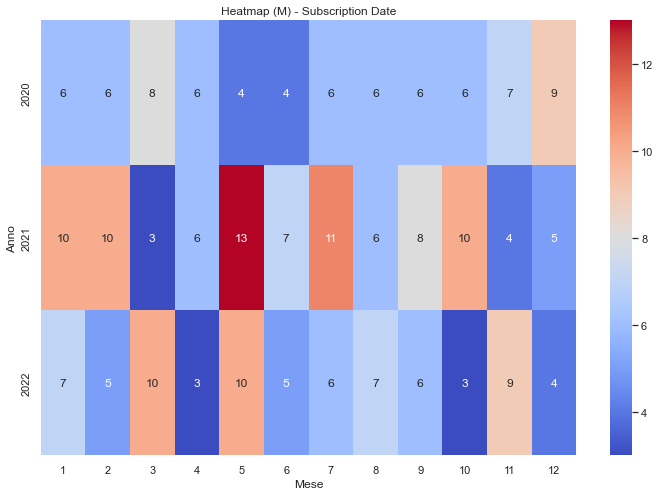

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,6,6,8,6,4,4,6,6,6,6,7,9
2021,10,10,3,6,13,7,11,6,8,10,4,5
2022,7,5,10,3,10,5,6,7,6,3,9,4


In [86]:
# subscription_date
summary_df_subscriptions = analyze_time_series(df, 'subscription_date', unique_users=True)
summary_df_subscriptions

In questo caso, ho definito una funzione per esaminare le serie temporali, che comprende la realizzazione di un grafico generale completo, un grafico comparato e un heatmap mensile, oltre che un df di recap con tutte le informazioni. Ho inoltre definito un'altra funziona che compara i risultati complessivi degli anni, in termini assoluti e relativi, con un grafico a ciambella e un df di recap. Le iscrizioni della nostra testata online mostrano variazioni significative da un mese all'altro e da un anno all'altro.

***Tendenze Annuali***:

- 2020: Nel 2020, le iscrizioni sembrano essere abbstanza uniformi nei diversi mesi, con una leggera tendenza ad aumentare verso la fine dell'anno.
- 2021: Il 2021 mostra un picco significativo di iscrizioni in maggio, seguito da un'altra piccola ondata in luglio. Le iscrizioni sono diminuite marcatamente in marzo e novembre.
- 2022: I primi mesi del 2022 indicano un modello meno prevedibile, con picchi alternati (marzo, maggio) e mesi con meno iscrizioni (aprile, dicembre).

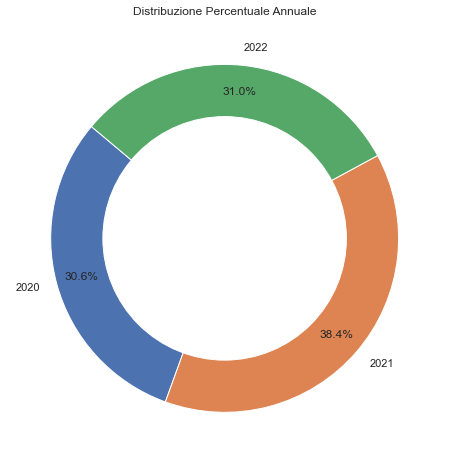

,Total,Percentage
year,,
2020,74,30.58
2021,93,38.43
2022,75,30.99


In [87]:
# annual comparison
annual_summary_subscriptions = summarize_annual_data(summary_df_subscriptions)
annual_summary_subscriptions

Le iscrizioni sono distribuite in modo relativamente bilanciato tra i tre anni, con leggere variazioni. C'è stato un leggero picco di iscrizioni nel 2021 (38.43% del totale), con 93 nuovi iscritti, suggerendo un aumento dell'interesse o dell'attività in quell'anno. Le iscrizioni del 2020 e del 2022 sono quasi uguali (circa il 31% ciascuno), rispettivamente 74 e 75 nuovi utenti, indicando una certa stabilità nel numero di nuovi utenti che si uniscono alla piattaforma.

### Read_date

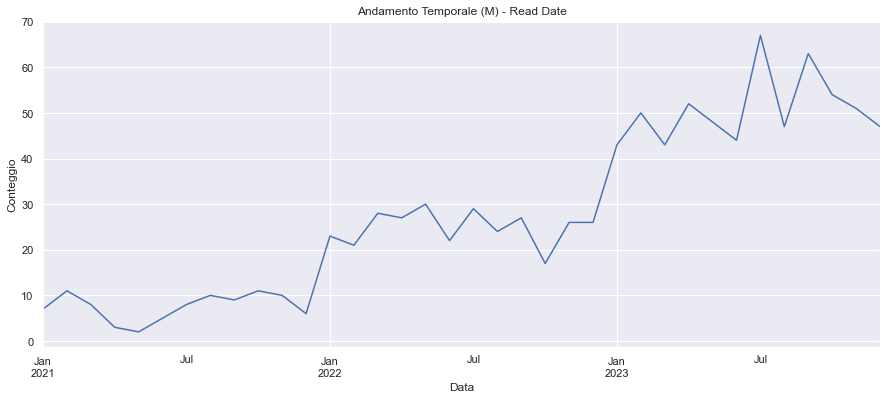

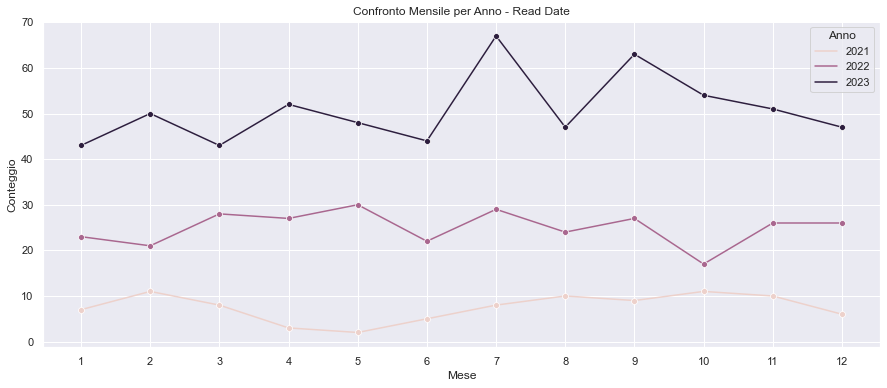

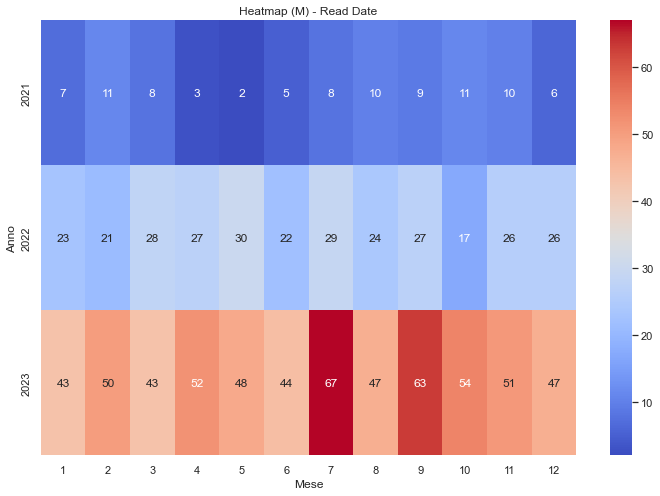

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2021,7,11,8,3,2,5,8,10,9,11,10,6
2022,23,21,28,27,30,22,29,24,27,17,26,26
2023,43,50,43,52,48,44,67,47,63,54,51,47


In [88]:
# read_date
summary_df_reads = analyze_time_series(df, 'read_date', unique_users=False)
summary_df_reads

C'è una chiara tendenza di crescita nel numero di letture da un anno all'altro. Questo indica un aumento dell'interesse e dell'engagement del pubblico nei confronti dei contenuti offerti dalla testata.  L'anno 2021 mostra numeri relativamente bassi di letture, con lievi fluttuazioni da un mese all'altro. Questo potrebbe riflettere la fase iniziale del sito o il processo di costruzione della base di lettori. Nel 2022, si osserva un aumento sostanziale delle letture in quasi tutti i mesi rispetto al 2021. Ciò suggerisce che la piattaforma ha probabilmente guadagnato popolarità. Il 2023 vede un'ulteriore crescita, con numeri ancora più elevati. Questo potrebbe indicare che la piattaforma si è ormai ben affermata, con una base di lettori fedele e in espansione.

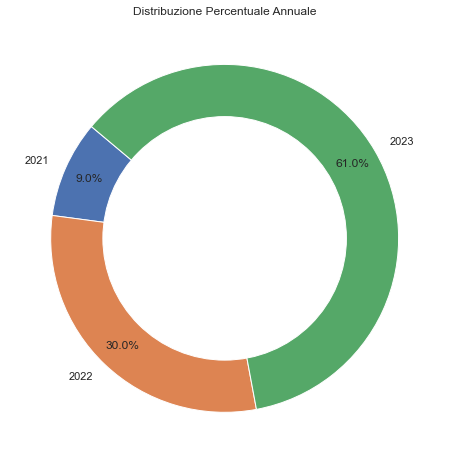

,Total,Percentage
year,,
2021,90,9.01
2022,300,30.03
2023,609,60.96


In [89]:
# annual comparison
annual_summary_reads = summarize_annual_data(summary_df_reads)
annual_summary_reads

I dati mostrano una crescita esponenziale delle letture nel tempo. Mentre il 2021 rappresenta solo il 9.01% del totale delle letture, il 2022 e il 2023 mostrano un aumento significativo, rispettivamente con il 30.03% e il 60.96% delle letture totali.

## Analisi degli identificativi

In [90]:
# definizione funzione analitica

def analyze_identifiers(df, column_name, top_n=10):
    # Conteggio dei valori unici e occorrenze
    unique_count = df[column_name].nunique()
    frequency = df[column_name].value_counts()

    # Top N analisi
    top_items = frequency.head(top_n)

    # Grafico a barre per Top N items
    plt.figure(figsize=(15, 6))
    top_items.plot(kind='bar')
    plt.title(f'Top {top_n} {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.show()

    # Creazione df di recap
    summary_df = pd.DataFrame({
        'Top Items': top_items
    })

    # conteggio totale e df di recap
    print(f'total: {unique_count}')
    return summary_df

### User_uuid

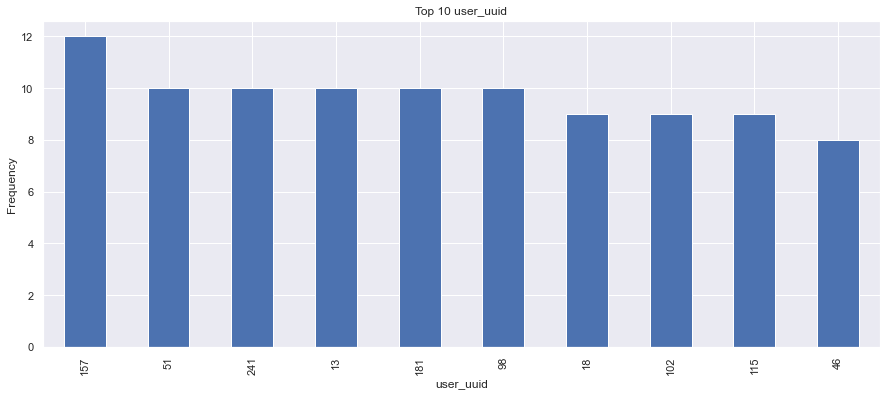

total: 242


,Top Items
157,12
51,10
241,10
13,10
181,10
98,10
18,9
102,9
115,9
46,8


In [91]:
# user_uuid
user_summary = analyze_identifiers(df, 'user_uuid')
user_summary

Questa funzione che ho definito stampa il totale degli identificativi unici, fa una top ten per quantità di letture, rendendo le informazioni in maniera grafica con un grafico a barre e in maniera dettagliata e testuale con un df di recap. Gli utenti della testata di divulgazione sono 242. Sopra si può vedere un grafico e un recap con la top 10 degli utenti per numero di articoli letti. Notiamo che l'utente con id 157 è il più attivo, con 12 articoli letti. Ultimo in questa top 10 l'utente con id 46, con 8 letture.

## Distribuzione utenti per numero di articoli letti

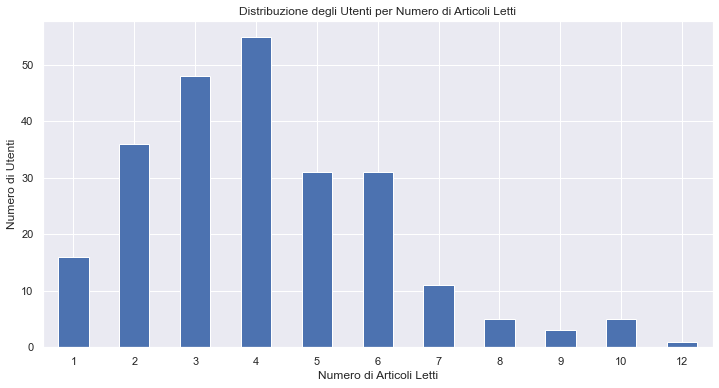

,Articles Read,Number of Users,Percentage of Users
0,1,16,6.61
1,2,36,14.88
2,3,48,19.83
3,4,55,22.73
4,5,31,12.81
5,6,31,12.81
6,7,11,4.55
7,8,5,2.07
8,9,3,1.24
9,10,5,2.07


In [92]:
# distribuzione
distribution = df['user_uuid'].value_counts().value_counts().sort_index()

# Creazione df recap 
distribution_df = pd.DataFrame({
    'Articles Read': distribution.index,
    'Number of Users': distribution.values,
    'Percentage of Users': (distribution.values / distribution.values.sum()) * 100
})

# grafico a barre in termini assoluti
plt.figure(figsize=(12, 6))
distribution.plot(kind='bar')
plt.title('Distribuzione degli Utenti per Numero di Articoli Letti')
plt.xlabel('Numero di Articoli Letti')
plt.ylabel('Numero di Utenti')
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

# df di recap con percentage
distribution_df.round(2)

Con questi risultati possiamo trarre altre osservazioni interessanti riguardo al numero di articoli letti dagli utenti. La distribuzione si concentra maggiormente nella fasce basse: la maggior parte degli utenti tende a leggere un numero relativamente basso di articoli. Ad esempio, il 6.61% degli utenti ha letto solo un articolo, e il 14.8% ne ha letti 2. Il picco della distribuzione di trova negli utenti che hanno letto 4 articoli, rappresentando il 22.7% degli utenti. Notiamo poi una diminuzione progressiva nel numero di utenti man mano che aumenta il numero di articoli letti: solo il 2% degli utenti ha letto 8 articoli e il numero scende ulteriormente per quantità maggiori di letture. Potremmo quindi concludere che la maggior parte degli utenti sembra avere un coinvolgimento relativamente basso, con solo una piccola percentuale che dimostra un alto livello di coinvolgimento.

### Journalist_id

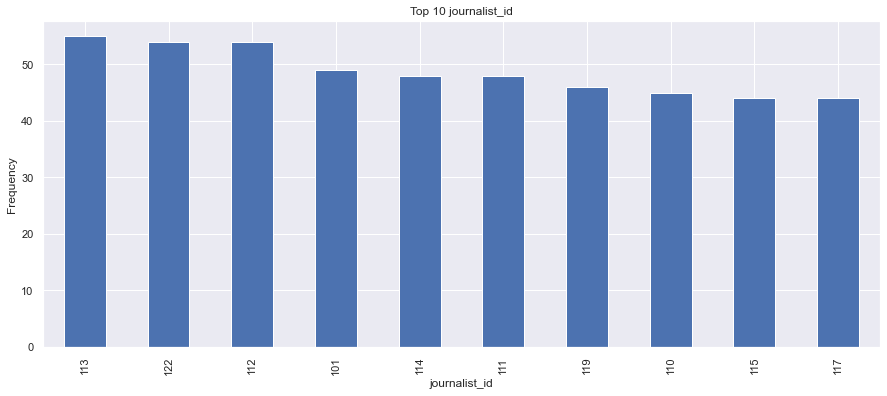

total: 23


,Top Items
113,55
122,54
112,54
101,49
114,48
111,48
119,46
110,45
115,44
117,44


In [93]:
# user_uuid
journalist_summary = analyze_identifiers(df, 'journalist_id')
journalist_summary

I giornalisti che hanno scritto articoli nella nostra piattaforma sono 23, e nel grafico a barre e nel df di recap vediamo i top10 giornalisti per numero di articoli scritti. Notiamo come l'id 113 rappresenta il giornalista con più articoli all'attivo, 55. Ultimo in questa top10 è il giornalista con id 117, con 44 articoli.

In [94]:
# raggruppamento per giornalista e conteggio articoli e media voti
journalist_summary = df.groupby('journalist_id').agg({'article_id': 'count', 'stars': 'mean'})
journalist_summary = journalist_summary.rename(columns={'article_id': 'Articles Count', 'stars': 'Average Rating'})
journalist_summary = journalist_summary.sort_values('Average Rating', ascending=False).round(2)
journalist_summary

,Articles Count,Average Rating
journalist_id,,
122,54,3.46
109,34,3.29
108,38,3.29
110,45,3.20
114,48,3.19
101,49,3.16
102,34,3.15
119,46,3.13
115,44,3.11


Qua sopra invece oltre al conteggio, ho aggiunto anche la media voti per ogni giornalista, e ho ordinato il dataframe dalla media più alta alla più bassa. Notiamo come in questa classifica al primo posto ci sia il giornalista con ID 122, che ha totalizzato una media voti pari a 3.46, con 54 articoli all'attivo. Anche i giornalisti con ID 109 e 108 hanno ottenuto delle valutazioni medie molto alte. Notiamo anche come la media più bassa appartenga ai giornalisti con ID 105 e 104, entrambi con una valutazione media di 2.51.

### Article_id

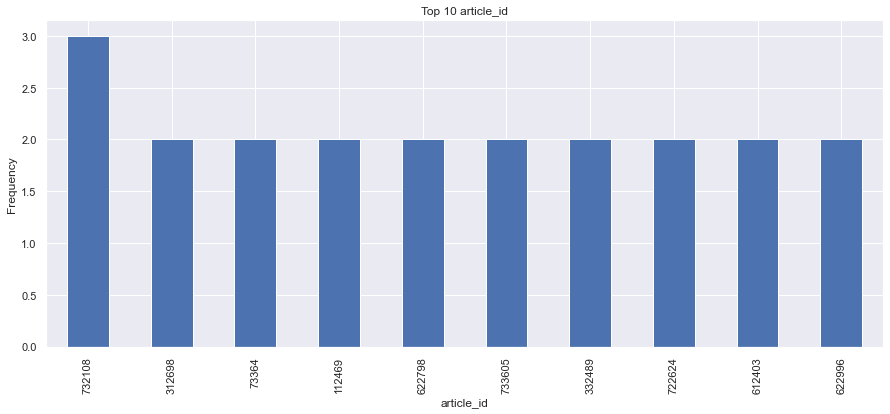

total: 987


,Top Items
732108,3
312698,2
73364,2
112469,2
622798,2
733605,2
332489,2
722624,2
612403,2
622996,2


In [95]:
# article_id
article_summary = analyze_identifiers(df, 'article_id')
article_summary

Gli articoli unici sono 987, e nel grafico a barre e nel df di recap possiamo notare la top10 degli articoli più letti. Notiamo che l'articolo più letto è stato letto 3 volte, tutti gli altri protagonisti di questa top10 hanno tutti quanti 2 letture. In generale, potrebbe essere utile vedere questi dati anche sotto un altra luce:

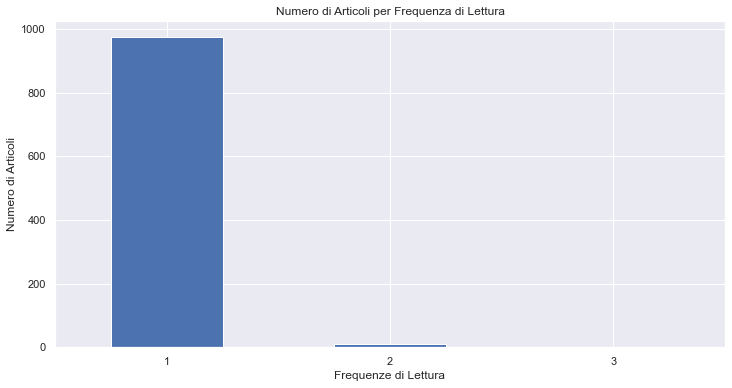

,Frequenza di Lettura,Numero di Articoli,Percentuale (%)
0,1,976,98.89
1,2,10,1.01
2,3,1,0.10


In [96]:
# Calcolo della frequenza di lettura per ogni articolo
read_frequencies = df['article_id'].value_counts()

# Calcolo del numero di articoli letti per ogni frequenza
articles_by_read_count = read_frequencies.value_counts().sort_index()

# Creazione del grafico a barre
plt.figure(figsize=(12, 6))
articles_by_read_count.plot(kind='bar')
plt.title('Numero di Articoli per Frequenza di Lettura')
plt.xlabel('Frequenze di Lettura')
plt.ylabel('Numero di Articoli')
plt.xticks(rotation=0)
plt.show()

# percentuali
total_articles = articles_by_read_count.sum()
articles_by_read_count_percentage = (articles_by_read_count / total_articles) * 100

# df di recap
recap_df = articles_by_read_count.reset_index()
recap_df.columns = ['Frequenza di Lettura', 'Numero di Articoli']
recap_df['Percentuale (%)'] = articles_by_read_count_percentage.values

recap_df.round(2)

Da questa analisi si può facilmente notare che la quasi totalità degli articoli sia stata letta una volta sola (98.8%), una piccolissima parte 2 volte (1%) e un solo articolo è stato letto 3 volte. Volendo potremmo procedere a fare l'identificazione dell'articolo più letto, così da rivelarne le caratteristiche.

In [97]:
# Identificazione dell'articolo più letto
most_read_article_ids = read_frequencies[read_frequencies == read_frequencies.max()].index

# Estrazione dei dettagli
details = []
for article_id in most_read_article_ids:
    article_details = df[df['article_id'] == article_id]
    details.append(article_details[['article_id', 'user_uuid',
                                    'read_date', 'category', 'journalist_id',
                                    'language', 'platform', 'country']])

# Concatenazione dei dettagli in un unico DataFrame
details_df = pd.concat(details)

details_df

,article_id,user_uuid,read_date,category,journalist_id,language,platform,country
276,732108,40,2022-08-04,weather,122,it,tablet,it
388,732108,180,2022-03-24,weather,115,it,tablet,it
738,732108,104,2023-04-14,weather,112,it,mobile,it


L'articolo più letto è quello con ID 732108, letto dagli utenti con id 40, 180 e 104. Tutte e tre le volte è stato letto in italiano, 2 volte da tablet e una da mobile. L'articolo era appartenente alla categoria "weather" e la sorpresa in questo caso arriva invece dai giornalisti: in questo caso l'analisi ci fa giungere ad alcune conclusioni singolari. L'utente 140 il 4 agosto del 2022 ha letto l'articolo con questo ID 732108 scritto dal giornalista con ID 122. L'utente 180 che ha letto lo stesso articolo il 24 marzo, l'ha letto scritto dal giornalista 115 questa volta. Mentre l'utente 104 ha letto l'articolo, il 14 aprile, ma scritto dal giornalista 112. Non avendo altre informazioni per contestualizzare e comprendere meglio queste particolarità, procederò con l'ultima parte della analisi, le valutazioni.

## Variabili Numeriche

### Stars

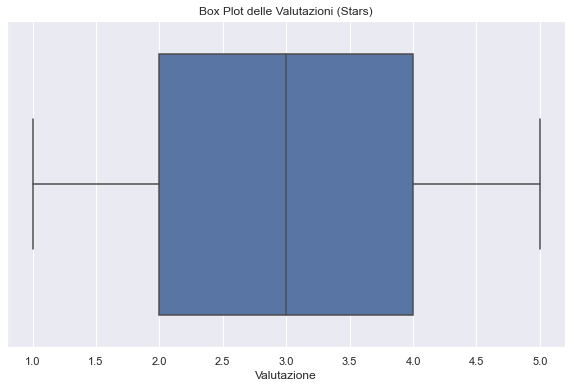

count    999.0
mean       3.0
std        1.4
min        1.0
25%        2.0
50%        3.0
75%        4.0
max        5.0
Name: stars, dtype: float64

In [98]:
# stats
stars_desc = df['stars'].describe()

# boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['stars'])
plt.title('Box Plot delle Valutazioni (Stars)')
plt.xlabel('Valutazione')
plt.show()

stars_desc.round(1)

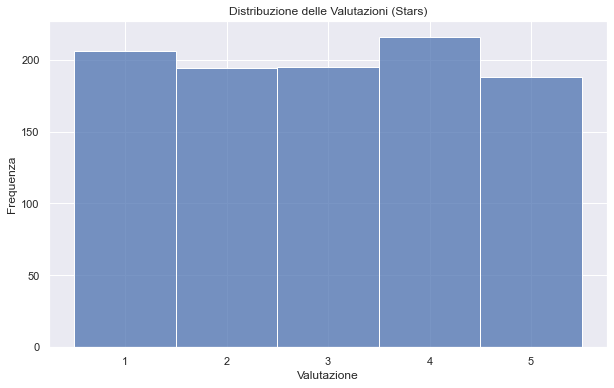

,Counts,Percentages
1,206,20.62
2,194,19.42
3,195,19.52
4,216,21.62
5,188,18.82


In [99]:
# distr valutazioni
plt.figure(figsize=(10, 6))
sns.histplot(df['stars'], bins=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5])
plt.title('Distribuzione delle Valutazioni (Stars)')
plt.xlabel('Valutazione')
plt.ylabel('Frequenza')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

# conteggi e percentuali
stars_counts = df['stars'].value_counts().sort_index()
total_stars = stars_counts.sum()
stars_percentages = (stars_counts / total_stars) * 100

# recap df
stars_summary_df = pd.DataFrame({
    'Counts': stars_counts,
    'Percentages': stars_percentages
}).round(2)

stars_summary_df

Per quanto riguarda le valutazioni, possiamo analizzarne la distribuzione con questo boxplot e con questo grafico a barre, oltre che al df di recap. Notiamo come la valutazione più frequente sia 4 stelle (216 articoli), rappresentando il 21,6% delle valutazioni totali. La valutazione meno frequente è invece 5 stelle, comparsa solamente 188 volte, rappresentando il 18.8% del totale. La media di valutazioni totali nella piattaforma è 3.

In [100]:
# Calcolo delle statistiche descrittive per ogni categoria
category_describe = df.groupby('category')['stars'].describe().round(2)
category_describe

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
art,61.0,3.18,1.30,1.0,2.0,3.0,4.0,5.0
economy,111.0,3.00,1.51,1.0,2.0,3.0,4.0,5.0
finance,134.0,2.87,1.44,1.0,2.0,3.0,4.0,5.0
lifestyle,76.0,3.16,1.42,1.0,2.0,3.0,5.0,5.0
news,105.0,3.21,1.45,1.0,2.0,3.0,4.0,5.0
sport,191.0,2.78,1.28,1.0,2.0,3.0,4.0,5.0
weather,321.0,3.00,1.43,1.0,2.0,3.0,4.0,5.0


Con queste statistiche riassuntive per categoria possiamo notare alcune cose interessanti.
Le categorie "Art", "Lifestyle" e "News" tendono a ricevere valutazioni mediamente più alte, indicando un gradimento generale da parte dei lettori. In particolare, "News" si distingue per avere una delle medie più alte, il che suggerisce una risposta positiva costante.
La categoria "Sport" mostra una media leggermente inferiore, indicando reazioni più miste o moderate. Questo potrebbe riflettere la varità di interessi e aspettative dei lettori questa categoria.
Interessante è osservare che le categorie "Economy" e "Finance", pur avendo medie intorno al neutro, presentano alcune delle deviazioni standard più alte. Questo indica che, sebbene le valutazioni medie siano moderate, esistono opinioni abbastanza polarizzate tra i lettori, con alcuni articoli che ricevono valutazioni molto alte e altri molto basse.

## Focus sul 2021
<a id="focus_2021"></a>

Quali sono gli articoli più letti nel 2021?

In [101]:
# Filtro il DataFrame per il 2021
df_2021 = df[df['read_date'].dt.year == 2021]

In [102]:
# top10 articles
top_articles = df_2021['article_id'].value_counts().sort_values(ascending=False).head(10)
unique_articles_2021 = df_2021['article_id'].nunique()
top_articles

# check sul numero di articoli del 2021
# unique_articles_2021

5128      1
63327     1
612403    1
632117    1
622487    1
732585    1
211653    1
233755    1
233155    1
323950    1
Name: article_id, dtype: int64

Questo output mostra come nessuno dei 90 articoli unici del 2021 sia stato letto più di una volta. Ho fatto un conteggio delle occorrenze per ogni articolo nel 2021 e nessuno appare più di una volta. Questo significa che non ci sono articoli che spiccano per frequenza di lettura nel 2021. Possiamo però vedere quale è la categoria di notizie che è stata letta di più.

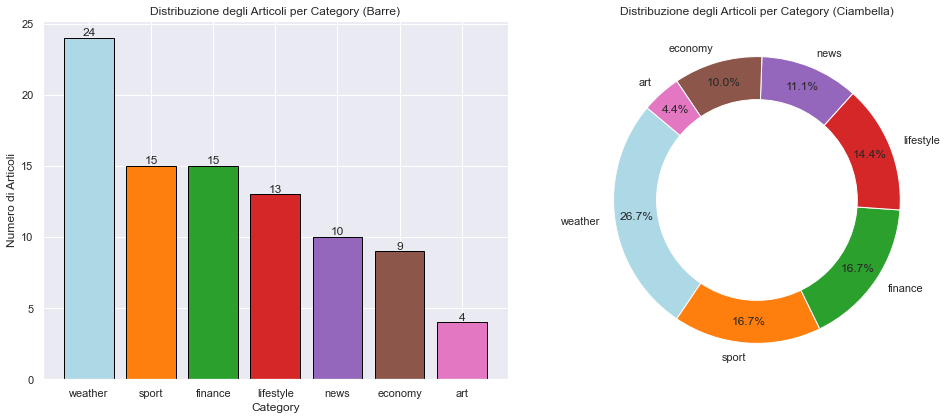

,category,articles_count,percentage
0,weather,24,26.67
1,sport,15,16.67
2,finance,15,16.67
3,lifestyle,13,14.44
4,news,10,11.11
5,economy,9,10.00
6,art,4,4.44


In [103]:
# utilizzo la funzione analitica precedente
category_2021summary = analyze_categoric(df_2021,'category',
                                         colors=['#add8e6', '#ff7f0e', '#2ca02c',
                                                 '#d62728', '#9467bd', '#8c564b', '#e377c2'])
category_2021summary

Nel 2021 nessun articolo è stato letto più di una volta, ma esaminando le letture per categorie notiamo che ci sono delle preferenze degli utenti che possiamo valutare. La categoria weather emerge come la più letta, con il 26.6% delle letture totali annuali. Seguono a pari merito sport e finance con oltre il 16.6%. Dopo troviamo lifestyle, news e economy con percentuali simili, tra il10 e il 14%. Ultimo posto è sempre della categoria art, con appena 4 articoli letti durante l'anno.

In [104]:
# media valutazione per categorie nel 2021
average_ratings_by_category = df_2021.groupby('category')['stars'].mean().sort_values(ascending=False)
average_ratings_by_category.round(2)

category
art          3.75
news         3.20
finance      3.00
weather      3.00
lifestyle    2.85
economy      2.33
sport        2.33
Name: stars, dtype: float64

Se invece prendiamo in considerazione non il numero totale di letture della categoria, ma la sua valutazione media degli articoli, notiamo che art è la categoria al primo posto, con una media di 3.75 stelle. La media più bassa spetta in questo caso alla categoria sport, con appena 2.33 stelle, esattamente come economy.

Per concludere sugli articoli più letti nel 2021, possiamo quindi notare che nessun articolo spicca sugli altri, ma la categoria più letta è weather con il 26% del totale: per quanto riguarda invece l'apprezzamento degli articoli, art è quella con la media migliore (3.75), sebbene abbia poche valutazioni (4)

### Come sono cambiati gli interessi durante l'anno?

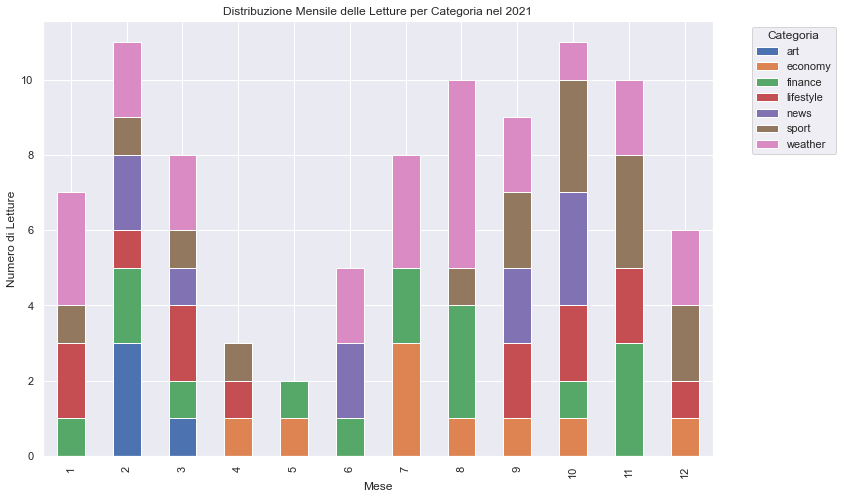

category,art,economy,finance,lifestyle,news,sport,weather
month,,,,,,,
1,NaN,NaN,1.0,2.0,NaN,1.0,3.0
2,3.0,NaN,2.0,1.0,2.0,1.0,2.0
3,1.0,NaN,1.0,2.0,1.0,1.0,2.0
4,NaN,1.0,NaN,1.0,NaN,1.0,NaN
5,NaN,1.0,1.0,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,NaN,2.0,NaN,2.0
7,NaN,3.0,2.0,NaN,NaN,NaN,3.0
8,NaN,1.0,3.0,NaN,NaN,1.0,5.0
9,NaN,1.0,NaN,2.0,2.0,2.0,2.0


In [105]:
# Creazione di una copia del df per il 2021
df_2021 = df[df['read_date'].dt.year == 2021].copy()
df_2021['month'] = df_2021['read_date'].dt.month

# conteggio letture per mese e categoria
monthly_interests = df_2021.groupby(['month', 'category']).size().unstack()

# Grafico a barre impilate 
monthly_interests.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Distribuzione Mensile delle Letture per Categoria nel 2021')
plt.xlabel('Mese')
plt.ylabel('Numero di Letture')
plt.legend(title='Categoria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# recap df
monthly_interests

- ***Art***: ha avuto poche letture, e solo in pochi mesi specifici (febbraio e marzo), suggerendo un interesse limitato o una minore frequenza di pubblicazione in questa categoria.

- ***Economy e Finance***:  hanno mostrato una presenza più costante nel corso dell'anno, con alcuni picchi, indicando un interesse sostenuto in queste categorie di notizie.

- ***Lifestyle e News***: hanno avuto letture in diversi mesi, con una distribuzione piuttosto equilibrata. Ciò suggerisce un interesse regolare per questi argomenti, con momenti "vuoti" come ad esempio in luglio ed agosto

- ***Sport***: ha avuto letture in vari mesi, con momenti "vuoti" in estate e un apparente aumento in autunno, probabilmente correlato agli eventi sportivi stagionali.

- ***Weather***: ha mostrato una presenza significativa e costante, con un picco in agosto. Interessanto notare l'assenza della categoria tra le letture di maggio ed aprile.

### Gli utenti fedeli stanno aumentando o diminuendo?

Per rispondere a questo interrogativo possiamo usare analisi fatte in precedenza, come la comparazione annuale delle iscrizioni.

In [106]:
# annual comparison
annual_summary_subscriptions

,Total,Percentage
year,,
2020,74,30.58
2021,93,38.43
2022,75,30.99


In generale, gli utenti stanno aumentando nel 2021. Si è passati da 74 iscritti nel 2020, a 93 nuove iscrizioni nel 2021. Definire però la parola "fedeli" può essere complicato perchè i criteri che plasmano la mia idea di "utente fedele" possono sicuramente divergere da quelli di qualcun altro. Conscio quindi del fatto che non esistano dei criteri specifici e universali per poter definire gli utenti fedeli, mi trovo però di fronte ad un altro interrogativo: partendo dal presupposto che non abbiamo record di letture per il 2020, ma avendo solo il numero di iscritti, è difficile pensare di poter rispondere ad una domanda che presuppone un confronto con questo anno. In particolare la domanda dice: " gli utenti fedeli stanno aumentando o diminuendo? (nel 2021)": il problema qua risiede nell'impossibilità di confrontare utenti fedeli del 2020 con utenti fedeli del 2021, in quanto non esistono record di letture nel 2020. Credo quindi che l'unica via perseguibile per rispondere al quesito sia di avere una visione "globale" degli utenti fedeli. Nessun utente che si è iscritto nel 2020 ha letto nel 2020 (o perlomeno non abbiamo i record), per cui per giudicare la loro fedeltà potrei avvalermi di un criterio generale, come quello del numero totale di letture. Una maniera logica di procedere per stabilire una soglia potrebbe essere quella di usare la media di letture. Potremmo considerare utenti fedeli, tutti quegli utenti che hanno letto più articoli della media. Andando ad intercettare quanti di questi si sono iscritti nel 2020 e quanti nel 2021, posso confrontare il conteggio e trovare quindi la risposta.

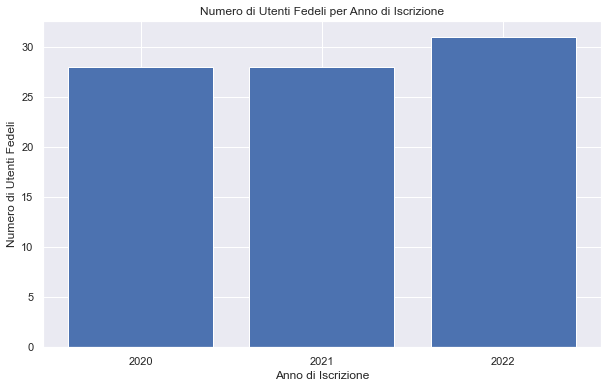

(4.128099173553719, 28, 28, 31)

In [107]:
# conteggio e media
user_read_count = df.groupby('user_uuid').size()
average_articles_read = user_read_count.mean()

# Identificazione degli utenti fedeli
threshold = average_articles_read
loyal_users = user_read_count[user_read_count > threshold].index

# Identificazione degli utenti iscritti in ciascun anno e che sono fedeli
loyal_users_2020 = df[(df['subscription_date'].dt.year == 2020) & (df['user_uuid'].isin(loyal_users))]['user_uuid'].nunique()
loyal_users_2021 = df[(df['subscription_date'].dt.year == 2021) & (df['user_uuid'].isin(loyal_users))]['user_uuid'].nunique()
loyal_users_2022 = df[(df['subscription_date'].dt.year == 2022) & (df['user_uuid'].isin(loyal_users))]['user_uuid'].nunique()

# dati per il grafico
loyal_users_data = {
    "2020": loyal_users_2020,
    "2021": loyal_users_2021,
    "2022": loyal_users_2022
}

# grafico a barre
plt.figure(figsize=(10, 6))
plt.bar(loyal_users_data.keys(), loyal_users_data.values())
plt.title('Numero di Utenti Fedeli per Anno di Iscrizione')
plt.xlabel('Anno di Iscrizione')
plt.ylabel('Numero di Utenti Fedeli')
plt.grid(True)
plt.show()

# recap media, utenti fedeli in ogni anno di iscrizione
threshold,loyal_users_2020, loyal_users_2021, loyal_users_2022


Avendo impostato la media di articoli letti dagli utenti (4.12) come soglia per trovare gli utenti "fedeli", ho ottenuto questo risultato: questi dati indicano che la fedeltà degli utenti è rimasta stabile dal 2020 al 2021(28 in entrambi gli anni), con un incremento nel 2022 (31). Questo suggerisce che gli utenti continuano a essere coinvolti con i contenuti nel tempo, con una tendenza crescente alla fedeltà. Ci tengo a sottolineare che la definizione di utenti fedeli è cruciale e influenza notevolmente i risultato dell'analisi. Ogni definizione porta a un diverso gruppo di utenti considerati "fedeli" e, di conseguenza, a conclusioni diverse sulla loro crescita o diminuzione. La definizione basata sulla media di articoli letti che ho utilizzato fornisce una misura dell'attività generale degli utenti, ma altre definizioni potrebbero evidenziare aspetti diversi dell'engagement e della fedeltà.

### Quali contenuti sono più efficaci nel coinvolgere gli utenti?

In [108]:
# media e conteggio
length_engagement = df_2021.groupby('length').agg({'stars': 'mean', 
                                              'article_id': 'count'}).rename(columns={'stars': 'Average_Rating',
                                                                                      'article_id': 'Read_Count'})
length_engagement.round(2)

,Average_Rating,Read_Count
length,,
long,2.95,40
medium,2.94,18
short,2.69,32


Sappiamo già che la categoria Weather, insieme a sport e Finance rappresentano le categorie più efficaci nel coinvolgere gli utenti. Per quanto riguarda gli articoli delle categorie stesse, vediamo che ci sono alcune preferenze, Gli articoli lunghi hanno la valutazione media più alta (2.95) e un numero significativo di letture (40), suggerendo che potrebbero essere leggermente più apprezzati rispetto ad articoli più corti.  Gli articoli di lunghezza media si trovano in una posizione intermedia, ma pressochè identica come media voti, agli articoli lunghi. Questo suggerisce che sono anch'essi popolari in termini di apprezzamento, ma un pochino meno dal lato dell'interesse (18 letture). Infine ci sono gli articoli short, i secondi più letti dopo quelli lunghi (32), ma con la media vota più bassa di tutte (2.69).

## Proposta di strategia
<a id="proposta_di_strategia"></a>

Dall'analisi esplorativa dei dati, è emerso che alcune categorie come weather, sport, finance attirano un'ampia percentuale di lettori, rappresentando rispettivamente il 32%, 19%, 13% del totale delle letture. Si potrebbe pensare di aumentare la produzione di contenuti in queste aree per capitalizzare su questi interessi esistenti. Inoltre, abbiamo notato che gli articoli con valutazioni medie più alte tendono a concentrarsi in categorie come news, art, lifestyle indicando una forte affinità del pubblico per questi temi. Date le varie preferenze espresse nelle diverse categorie, si può pensare di implementare sistemi di raccomandazione personalizzati. Si possono sviluppare strategie di personalizzazione del contenuto, come newsletter segmentate o raccomandazioni basate su algoritmi di machine learning. Questo approccio consentirà di offrire contenuti più mirati e pertinenti a ciascun segmento di pubblico.

## Conclusioni 
<a id="conclusioni"></a>

In questo progetto, ho adotatto un approccio metodico e strutturato per analizzare i dati di una testata online di divulgazione scientifica. Ho esplorato il dataset, estraendo intuizioni significative sul comportamento e le preferenze dei lettori. L'utilizzo di funzioni personalizzate per l'analisi mi ha fornito un nuovo approccio, permettendomi di esaminare i dati con maggiore ordine, efficienza e flessibilità. Il risultato è una panoramica completa dei dati della testata online, che offre una comprensione più profonda dei dati e spunti per strategie di contenuto mirate e decisioni informate.